## Recommend System Homework

>Author: YangXin 2011028
>
>College: Nankai University


**A recommendation system, also known as a recommender system**, is a software algorithm or system that suggests items, products, or information to users based on their preferences, interests, or past behavior. The goal of a recommendation system is to provide personalized and relevant recommendations to users, thereby assisting them in discovering new items, enhancing their overall user experience, and increasing engagement and satisfaction.

Recommendation systems are commonly found in various online platforms and applications, such as e-commerce websites, streaming services, social media platforms, news websites, and more. These systems analyze vast amounts of data, including user behavior, item characteristics, and historical interactions, to generate recommendations that match users' individual tastes and needs.

There are different approaches to building recommendation systems, including:

**Content-Based Filtering**: This approach analyzes the characteristics of items, such as their descriptions, genres, or tags, and recommends items with similar attributes to those previously liked or interacted with by the user. For example, if a user has shown interest in science fiction movies, a content-based recommender would suggest other science fiction movies.

**Collaborative Filtering**: Collaborative filtering examines the past behavior and preferences of multiple users to identify patterns and make recommendations. It can be divided into two types:

**User-based**: This method recommends items based on the preferences of users who have similar tastes to the target user. For instance, if User A and User B have both enjoyed similar movies, the system may suggest movies that User B has liked to User A.

**Item-based**: This method recommends items based on their similarity to other items that the user has already liked. If a user enjoys a particular movie, the system will suggest other movies that are similar in terms of genre, actors, or themes.

**Hybrid Methods**: These combine multiple recommendation techniques, such as content-based filtering and collaborative filtering, to provide more accurate and diverse recommendations. By leveraging different approaches, hybrid methods aim to overcome the limitations of individual techniques and improve the quality of recommendations.

Recommendation systems have become essential tools for enhancing user experience, increasing customer satisfaction, and driving business growth in various industries. They help users navigate the vast amount of available options, discover new items, and save time by presenting them with personalized suggestions tailored to their preferences.

**This experiment is based on the product collaborative filtering algorithm to design the recommendation algorithm.**

### Data Analysis

The Data Format is:

**train.txt**

user_id|numbers of rating items

item_id   score

**test.txt**

user_id|numbers of rating items

item_id

**item.txt**

item_id|attribute_1|attribute_2('None' means this item is not belong to any of attribute_1/2)


#### Statistical analysis of the data

Now, we use the python to help us to analysis the data.

First we need to load the file.

In [1]:
attr_file_path = './data/itemAttribute.txt'
test_file_path = './data/test.txt'
train_file_path = './data/train.txt'
attr_csvfile_path = './data/attr.csv'
train_csvfile_path = './data/train.csv'
test_csvfile_path = './data/test.csv'

In [21]:
#将txt文档以csv的形式存储，方便操作

#将itemAttribute转为csv格式
import csv

with open(attr_file_path, "r") as file:
    lines = file.readlines()
    
attr_data = []

# 得到最大的item_id
max_item_id, _, _ = lines[-1].strip().split("|")

# print(max_item_id)

for i in range(0, int(max_item_id)+1):
    attr_data.append([i, 0, 0])
        
for line in lines:
    item_id, attribute_1, attribute_2 = line.strip().split("|")
    if attribute_1 == "None":
        attribute_1 = 0
    if attribute_2 == "None":
        attribute_2 = 0
    attr_data[int(item_id)] = [item_id, attribute_1, attribute_2]

file.close()
    
with open(attr_csvfile_path, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["item_id", "attribute_1", "attribute_2"])  # Write header
    writer.writerows(attr_data)  # Write data rows

print("Conversion completed. CSV file generated: ", attr_csvfile_path)
file.close()

Conversion completed. CSV file generated:  ./data/attr.csv


In [3]:
# 将train转为csv的形式 <user_id> <item_id> <rank>
with open(train_file_path, "r") as file:
    lines = file.readlines()
    
train_data = []

for i in range(0, len(lines)):
    #对于每个用户处理
    if len(lines[i].strip().split("|")) == 2:
        user_id, user_rank_count = lines[i].strip().split("|")
        user_rank_count = int(user_rank_count)
        for j in range(i+1, i+user_rank_count+1):
            item_id, rank = lines[j].strip().split()
            train_data.append([user_id, item_id, rank])
    else:
        continue
file.close()
        
with open(train_csvfile_path, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["user_id", "item_id", "rank"])  # Write header
    writer.writerows(train_data)  # Write data rows
    
print("Conversion completed. CSV file generated: ", train_csvfile_path)
file.close()

Conversion completed. CSV file generated:  ./data/train.csv


In [6]:
# 将train转为csv的形式 <user_id> <item_id> <rank>
with open(test_file_path, "r") as file:
    lines = file.readlines()
    
test_data = []

for i in range(0, len(lines)):
    #对于每个用户处理
    if len(lines[i].strip().split("|")) == 2:
        user_id, user_rank_count = lines[i].strip().split("|")
        user_rank_count = int(user_rank_count)
        for j in range(i+1, i+user_rank_count+1):
            item_id = lines[j].strip()
            test_data.append([user_id, item_id, 0])
    else:
        continue
file.close()
        
with open(test_csv_file_path, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["user_id", "item_id", "rank"])  # Write header
    writer.writerows(test_data)  # Write data rows
    
print("Conversion completed. CSV file generated: ", test_csv_file_path)
file.close()

Conversion completed. CSV file generated:  ./data/test.csv


#### Perform visual analysis on data

Now we can use some tools to visual the data

In [2]:
import pandas as pd
import numpy as np

train_dataset = pd.read_csv(filepath_or_buffer=train_csvfile_path,
                              sep=',', header=None, names=['user_id', 'item_id', 'rank'],
                              skiprows=1)
test_dataset = pd.read_csv(filepath_or_buffer=test_csvfile_path,
                              sep=',', header=None, names=['user_id', 'item_id', 'rank'],
                              skiprows=1)
attr_dataset = pd.read_csv(filepath_or_buffer=attr_csvfile_path,
                              sep=',', header=None, names=['item_id', 'attribute_1', 'attribute_2'],
                              skiprows=1)


We can the the size of the data

In [4]:
train_dataset.shape

(5001507, 3)

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001507 entries, 0 to 5001506
Data columns (total 3 columns):
 #   Column   Dtype
---  ------   -----
 0   user_id  int64
 1   item_id  int64
 2   rank     int64
dtypes: int64(3)
memory usage: 114.5 MB


Let us see the head of 10 info

In [6]:
train_dataset.head(n=10)

,user_id,item_id,rank
0,0,518385,100
1,0,550452,90
2,0,600770,80
3,0,194044,90
4,0,295315,90
5,0,127640,50
6,0,192496,90
7,0,531386,80
8,0,123025,90
9,0,147073,80


Then we can statist the data, such as the user_num, item_num, avg_rank etc.

In [5]:
# 得到相关信息

unique_user_count = train_dataset['user_id'].nunique()
print("用户总数: ", unique_user_count)
train_item_count = train_dataset['item_id'].nunique()
print("训练集商品总数: ", train_item_count)
unique_item_count = attr_dataset['item_id'].nunique()
print("商品总数: ", unique_item_count)
noattr_item_set = attr_dataset[(attr_dataset['attribute_1']==0) & (attr_dataset['attribute_2']==0)]
noattr_item_count = len(noattr_item_set)
print("无属性商品总数: ", noattr_item_count)
train_records_count = len(train_dataset)
print("训练集评分总数: ", train_records_count)
test_records_count = len(test_dataset)
print("测试集评分总数: ", test_records_count)
test_rank_avg = train_dataset['rank'].sum() / train_records_count
print("训练集评分平均: ", test_rank_avg)
attr_item1_avg = attr_dataset['attribute_1'].sum() / unique_item_count
attr_item2_avg = attr_dataset['attribute_2'].sum() / unique_item_count
print("商品属性1的平均: ", attr_item1_avg)
print("商品属性2的平均: ", attr_item2_avg)

with open('./results/data_statistic.txt', 'w') as file:
    file.write("用户总数: " + str(unique_user_count) + '\n')
    file.write("训练集商品总数: " + str(train_item_count) + '\n')
    file.write("商品总数: " + str(unique_item_count) + '\n')
    file.write("无属性商品总数: " + str(noattr_item_count) + '\n')
    file.write("训练集评分总数: " + str(train_records_count) + '\n')
    file.write("测试集评分总数: " + str(test_records_count) + '\n')
    file.write("训练集评分平均: " + str(test_rank_avg) + '\n')
    file.write("商品属性1的平均: " + str(attr_item1_avg) + '\n')
    file.write("商品属性2的平均: " + str(attr_item2_avg) + '\n')
file.close()


用户总数:  19835
训练集商品总数:  455705
商品总数:  507172
无属性商品总数:  40846
训练集评分总数:  5001507
测试集评分总数:  119010
训练集评分平均:  49.50458011955197
商品属性1的平均:  288394.8737647189
商品属性2的平均:  272492.80033203727


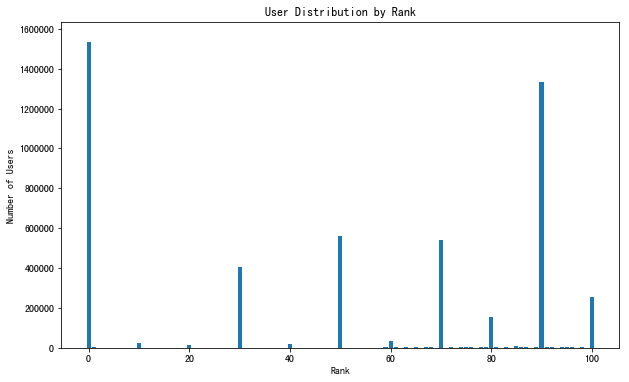

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# 统计每个rank值对应的user_id数量
rank_counts = train_dataset.groupby('rank')['user_id'].count()

#创建图表
plt.figure(figsize=(10,6))

#绘制柱状图
plt.bar(rank_counts.index, rank_counts.values)

# 设置图表标题和标签
plt.title("User Distribution by Rank")
plt.xlabel("Rank")
plt.ylabel("Number of Users")

# 设置纵轴范围
plt.ylim(0, rank_counts.max() + 100000)

#显示图表
plt.savefig('./img/user_rank_distribution.png')
plt.show()


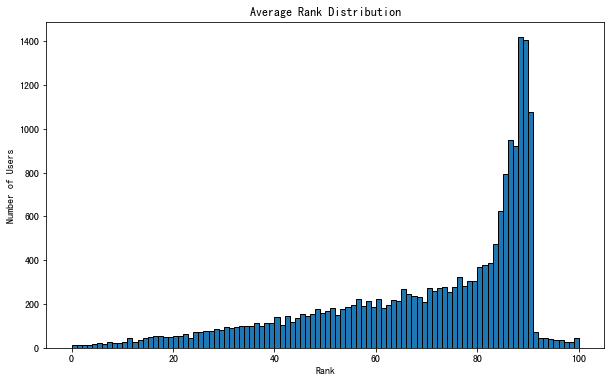

In [26]:
# 计算每个用户的平均评分
user_avg_rank = train_dataset.groupby('user_id')['rank'].mean()
print()

#创建图表
plt.figure(figsize=(10,6))

#绘制柱状图
plt.hist(user_avg_rank, bins=100, range=(0,100), edgecolor='black')

# 设置图表标题和标签
plt.title("Average Rank Distribution")
plt.xlabel("Rank")
plt.ylabel("Number of Users")

# 显示图表
plt.savefig('./img/average_rank_distribution_user.png')
plt.show()

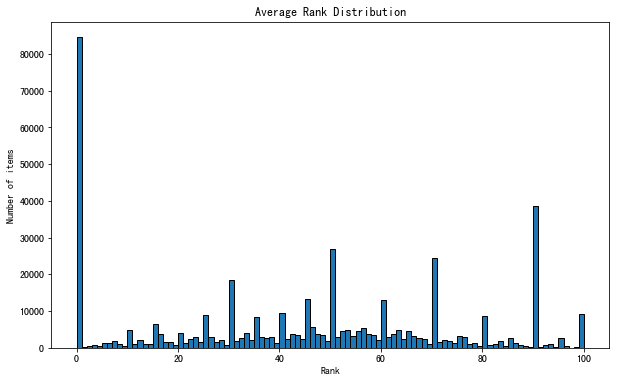

In [27]:
# 计算每个物品的平均评分
user_avg_rank = train_dataset.groupby('item_id')['rank'].mean()
print()

#创建图表
plt.figure(figsize=(10,6))

#绘制柱状图
plt.hist(user_avg_rank, bins=100, range=(0,100), edgecolor='black')

# 设置图表标题和标签
plt.title("Average Rank Distribution")
plt.xlabel("Rank")
plt.ylabel("Number of items")

# 显示图表
plt.savefig('./img/average_rank_distribution_item.png')
plt.show()

### Recommendation Algorithm Based on Item Similarity

Select the similarity calculation method to calculate the recommendation result by similarity

Here we use the Pearson correlation coefficient to define the similarity.

Generally, it indicates the closeness of the relationship between two fixed-distance variables, and the value range is [-1,1]

![img](./img/Pearson.png)

where Sx,Sy are the sample standard deviations of x and y.


#### Evaluation Index

The user behavior data is randomly divided into M parts according to the uniform distribution, one part is selected as the test set, and the remaining M-1 parts are used as the training set. In order to prevent the evaluation index from being the result of over-fitting, a total of M experiments were carried out, each time using a different test set. Then the average value of the evaluation indexes measured by M experiments is taken as the final evaluation index.

1. Recall rate

![img](./img/Recall.png)

2. Accuracy

![img](./img/Accuracy.png)

3. Coverage

![img](./img/Coverage.png)

In [4]:
for index, row in train_dataset.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rank = row['rank']
    print(user_id, item_id, rank)
    if index > 10:
        break

0 518385 100
0 550452 90
0 600770 80
0 194044 90
0 295315 90
0 127640 50
0 192496 90
0 531386 80
0 123025 90
0 147073 80
0 137915 90
0 497792 90


In [46]:
import timeit
import math
from scipy.sparse import coo_matrix, lil_matrix, dok_matrix

# 定义基于物品的系统过滤算法

class ItemBasedCF():
    def __init__(self):
        self.n_sim_item = 20 #相似物品数
        self.n_rec_item = 10 #推荐物品数
        self.train = None #训练集
        self.test = None #测试集
        self.item_sim_matrix = lil_matrix((624961, 624961), dtype=np.float32) #相似矩阵
        self.item_popular = {} #每个物品被评价次数
        self.item_count = 0 #物品数
        
    def get_dataset(self, train_dataset):
        self.user_group = train_dataset.groupby('user_id').agg([list])[['item_id', 'rank']]
        self.user_ids = train_dataset['user_id'].astype(int)
        self.item_ids = train_dataset['item_id'].astype(int)
        self.ranks = train_dataset['rank'].astype(int)
        self.user_items = train_dataset.groupby('user_id')['item_id'].agg(list)
        print('Load dataset success!')

    '''
    1.  The first step reads each user and the items they have watched in a loop, 
        and counts the number of times each item has been watched, as well as the 
        total number of items; 
    2.  the second step calculates the matrix C, C[i][j] means that you like item 
        i at the same time and the number of users of j, and consider the penalty for active users; 
    3.  the third step is to calculate the similarity between items according to the formula Pearson correlation coefficient; 
    4.  the fourth step is to normalize.
    '''
    def calc_item_sim(self):
        start = timeit.default_timer()
        for iid in self.item_ids:
            if iid not in self.item_popular:
                self.item_popular[iid] = 0
            self.item_popular[iid] += 1
        self.item_count = len(self.item_popular)
        print('item_popular success!')
        print(self.item_count)
        
        for user,items in self.user_items.iteritems():
            for i1 in items:
                for i2 in items:
                    if i1 == i2:
                        continue
                    self.item_sim_matrix[i1, i2] += 1/math.log(1+len(items))
        print('Build co-rated users matrix success!')
        
        num_rows, num_cols = dok_matrix.shape
        for i1 in range(num_rows):
            for i2 in range(num_cols):
                self.item_sim_matrix[i1][i2] /= math.sqrt(self.item_popular[i1]*self.item_popular[i2])
        print('Calculate item similarity matrix success!')
        
        max_w = 0
        for i1 in range(num_rows):
            for i2 in range(num_cols):
                if max_x > self.item_sim_matrix[i1][i2]:
                    max_w = self.item_sim_matrix[i1][i2]
        for i1 in range(num_rows):
            for i2 in range(num_cols):
                if max_x > self.item_sim_matrix[i1][i2] :
                    self.item_sim_matrix[i1][i2] = self.item_sim_matrix[i1][i2]/max_w
        
                self.item_sim_matrix[i1][i2] /= math.sqrt(self.item_popular[i1]*self.item_popular[i2])
        end = timeit.default_timer()
        all_time = end - start
        print('Time cost is : %fs' % all_time)
        
    #针对目标用户U，找到K个相似的物品，并推荐N个物品，如果用户评价过该物品则不推荐
    def recommend(self, user):
        K = self.n_sim_item
        N = self.n_rec_item
        rank = {}
        used_items = self.user_items[user]
        for item, rating in used_items.items():
            for related_item, w in sorted(self.item_sim_matrix[item].items(), key=itemgetter(1), reverse=True)[:K]:
                if related_item in used_items:
                    continue
                rank.setdefault(related_item,0)
                rank[related_item] += w*float(rating)
        return sorted(rank.items(), key=itemgetter(1),reverse=True)[0:N]
    

In [ ]:
itemCF = ItemBasedCF()
itemCF.get_dataset(train_dataset)
itemCF.calc_item_sim()

In [ ]:
itemCF.recommend(0)

### Recommendation based on SVD matrix factorization

Use matrix decomposition method to get recommendation results quickly and efficiently.

Singular Value Decomposition (SVD) is a classic method in matrix decomposition. Next, our recommendation can be calculated by SVD. The basic starting point of SVD is somewhat similar to the hidden semantic model. The matrix is converted into a combination of small matrices.

#### SVD python

In [15]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.sparse import coo_matrix
import math as mt

# 提取用户、物品和评分数据列
user_ids = train_dataset['user_id']
item_ids = train_dataset['item_id']
ranks = train_dataset['rank']

dense_matrix = coo_matrix((ranks, (user_ids, item_ids)), dtype=int)

In [43]:
'''
BiasSvd Model
'''

import random

class BiasSvd(object):
    def __init__(self, alpha, reg_p, reg_q, reg_bu, reg_bi, number_LatentFactors=10, number_epochs=10, columns=["user_id", "item_id", "rank"]):
        self.alpha = alpha # 学习率
        self.reg_p = reg_p
        self.reg_q = reg_q
        self.reg_bu = reg_bu
        self.reg_bi = reg_bi
        self.number_LatentFactors = number_LatentFactors  # 隐式类别数量
        self.number_epochs = number_epochs
        self.columns = columns
        self.P = None
        self.Q = None

    def train(self, dataset):
        '''
        fit dataset
        :param dataset: uid, iid, rating
        :return:
        '''

        self.dataset = pd.DataFrame(dataset)
        self.users_ratings = dataset.groupby(self.columns[0]).agg([list])[[self.columns[1], self.columns[2]]]
        self.items_ratings = dataset.groupby(self.columns[1]).agg([list])[[self.columns[0], self.columns[2]]]
        self.globalMean = self.dataset[self.columns[2]].mean()

        self.P, self.Q, self.bu, self.bi = self.sgd()

    def _init_matrix(self):
        '''
        初始化P和Q矩阵，同时为设置0，1之间的随机值作为初始值
        :return:
        '''
        # User-LF
        P = dict(zip(
            self.users_ratings.index,
            np.random.rand(len(self.users_ratings), self.number_LatentFactors).astype(np.float32)
        ))
        # Item-LF
        Q = dict(zip(
            self.items_ratings.index,
            np.random.rand(len(self.items_ratings), self.number_LatentFactors).astype(np.float32)
        ))
        return P, Q

    def sgd(self):
        '''
        使用随机梯度下降，优化结果
        :return:
        '''
        P, Q = self._init_matrix()

        # 初始化bu、bi的值，全部设为0
        bu = dict(zip(self.users_ratings.index, np.zeros(len(self.users_ratings))))
        bi = dict(zip(self.items_ratings.index, np.zeros(len(self.items_ratings))))

        for i in range(self.number_epochs):
            print("iter %d"%i)
            error_list = []
            for uid, iid, r_ui in self.dataset.itertuples(index=False):
                v_pu = P[uid]
                v_qi = Q[iid]
                err = np.float32(r_ui - self.globalMean - bu[uid] - bi[iid] - np.dot(v_pu, v_qi))

                v_pu += self.alpha * (err * v_qi - self.reg_p * v_pu)
                v_qi += self.alpha * (err * v_pu - self.reg_q * v_qi)

                P[uid] = v_pu 
                Q[iid] = v_qi

                bu[uid] += self.alpha * (err - self.reg_bu * bu[uid])
                bi[iid] += self.alpha * (err - self.reg_bi * bi[iid])

                error_list.append(err ** 2)
            self.alpha = self.alpha * 0.93
            print("mase = ", np.sqrt(np.mean(error_list)))

        return P, Q, bu, bi
    
    def test(self, testset):
        predict_rating = []
        for uid, iid, real_rating in testset.itertuples(index=False):
            try:
                pred_rating = self.predict(uid, iid)
                predict_rating.append(pred_rating)
            except Exception as e:
                print(e)
        result = pd.DataFrame()
        result['user_id'] = testset['user_id']
        result['item_id'] = testset['item_id']
        result['pred'] = predict_rating
        result.to_csv('./data/result.csv', index=False)
        print("Save success!")
        
    def predict(self, uid, iid):

        if uid not in self.users_ratings.index or iid not in self.items_ratings.index:
            return self.globalMean

        p_u = self.P[uid]
        q_i = self.Q[iid]

        return self.globalMean + self.bu[uid] + self.bi[iid] + np.dot(p_u, q_i)

In [44]:
bsvd = BiasSvd(0.0003, 0.00001, 0.00001, 0.01, 0.01, 10, 30)
bsvd.train(train_dataset)

iter 0
mase =  32.10766784944526
iter 1
mase =  29.69801617823612
iter 2
mase =  28.72866577628515
iter 3
mase =  27.959111838264153
iter 4
mase =  27.1676448112239
iter 5
mase =  26.37683802305748
iter 6
mase =  25.65586989376498
iter 7
mase =  25.03053932398113
iter 8
mase =  24.49442479975343
iter 9
mase =  24.03483533582335
iter 10
mase =  23.64022180469128
iter 11
mase =  23.300475487507324
iter 12
mase =  23.006738603494036
iter 13
mase =  22.75142456728126
iter 14
mase =  22.52822339375017
iter 15
mase =  22.33198700807679
iter 16
mase =  22.158541093335817
iter 17
mase =  22.004494440849975
iter 18
mase =  21.867076603595656
iter 19
mase =  21.744008274947202
iter 20
mase =  21.63340030999597
iter 21
mase =  21.53367495090605
iter 22
mase =  21.443504972995658
iter 23
mase =  21.361765812767207
iter 24
mase =  21.287498490909154
iter 25
mase =  21.21987992831098
iter 26
mase =  21.158199738048967
iter 27
mase =  21.101841261105903
iter 28
mase =  21.05026663921421
iter 29
mase 

In [45]:
bsvd.test(test_dataset)

Save success!


In [19]:
while True:
    uid = input("uid: ")
    iid = input("iid: ")
    print(bsvd.predict(int(uid), int(iid)))

#### 基于内容的推荐算法

In [42]:
# 包含所有物品平均分的字典grouped_data
def get_avg():
    '''
    获得平均分
    '''
    avg_data = train_dataset.groupby('item_id')['rank'].mean()
    return avg_data

# 得到存储所有物品种类的字典item_cast
def get_item_cast():
    '''
    得到所有种类
    '''
    attribute_1_values = attr_dataset['attribute_1'].unique().tolist()
    attribute_2_values = attr_dataset['attribute_2'].unique().tolist()
    # 合并两个列表并去重
    item_cast = list(set(attribute_1_values + attribute_2_values))
    return item_cast

# 得到所有种类下排名前100的物品列表
def get_item_sort(avg_data, item_cast):
    '''
    得到种类前100
    '''
    item_sort = {}
    merged_data = pd.merge(avg_data, attr_dataset, on='item_id')
    for attribute in item_cast:
        item_sort[attribute] = []
        if int(attribute) != 0:
            # 筛选出该种类的物品，并按照平均分进行降序排序)
            item_sort[attribute].append(merged_data[merged_data['attribute_1'] == attribute].sort_values(by='rank', ascending=False)['item_id'])
            item_sort[attribute].append(merged_data[merged_data['attribute_2'] == attribute].sort_values(by='rank', ascending=False)['item_id'])
    return item_sort

# 得到用户的偏好
def get_user_like():
    '''
    得到用户最喜欢的几个种类
    '''
    user_like = {}
    user_items = train_dataset.groupby('user_id')['item_id'].agg(list)
    user_ratings = train_dataset.groupby('user_id')['rank'].agg(list)
    user_count = len(user_items)
    for uid in range(0, user_count):
        user_like[uid] = {}
        index = 0
        if uid % 1000 == 0:
            print(uid)
        for iid in user_items[uid]:
            #找到物品属于的种类
            attr = attr_dataset.iloc[iid][1:].tolist()
            for a in attr:
                if a not in user_like[uid]:
                    # print(uid, iid)
                    user_like[uid][a] = 0
                user_like[uid][a] += user_ratings[uid][index] * 0.5
            index += 1
    return user_like
    
#对用户进行推荐           
def recom(user_like, user_id, item_sort):
    topk = 2
    # 对用户喜欢的属性进行排序
    for uid in user_id:
        sorted_keys = sorted(user_like[uid], key=user_like[uid].get, reverse=True)
        key = 0
        if len(sorted_keys) != 0:
            if sorted_keys[0] == 0:
                if len(sorted_keys) > 1:
                    key = sorted_keys[1]
                    print("该用户最喜欢种类", sorted_keys[1])
                else:
                    key = sorted_keys[0]
                    print("该用户最喜欢种类", sorted_keys[0])
            else:
                key = sorted_keys[0]
                print("该用户最喜欢种类", sorted_keys[0])
            #然后对其开始推荐
            print("为用户", uid, "进行推荐: ")
            
            for i in range(topk):
                if i in item_sort[key][0]:
                    print(item_sort[key][0][i])
                elif i in item_sort[key][1]:
                    print(item_sort[key][1][i])
                else:
                    print("无法推荐")
        else:
            print("无法推荐!")

In [43]:
avg_data = get_avg()
item_cast = get_item_cast()
item_sort = get_item_sort(avg_data, item_cast)

In [ ]:
# print(item_sort[587636][1])
user_like = get_user_like()

0
1000
2000
3000


In [ ]:
user_id = [0, 56, 89, 1234, 12345]
recom(user_like, user_id, item_sort)

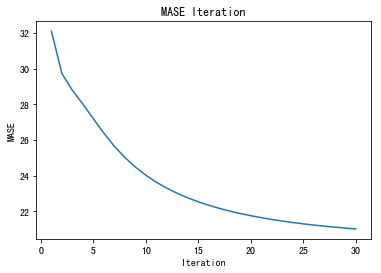

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
mase = [32.10260995493488, 29.725567256047764, 28.7864705812477, 28.011844350993925, 27.193525377158974, 26.379731773963556, 25.650278448901272, 25.021375007767077, 24.48363467761111, 24.02486683180316, 23.633133534455137, 23.29714708763214, 23.007110918351366, 22.75498259128623, 22.534314426821606, 22.339983041181906, 22.167908502171663, 22.014811561994893, 21.87802589518514, 21.755358580649315, 21.644987700678854, 21.545385733629214, 21.455261948245944, 21.373517841453353, 21.29921270214835, 21.231536168979012, 21.1697865294105, 21.113353028532458, 21.06170175894698, 21.014363884290702]
# 绘制 MSE 随迭代次数变化的折线图
plt.plot(range(1, len(mase) + 1), mase)
plt.xlabel('Iteration')
plt.ylabel('MASE')
plt.title('MASE Iteration')
plt.show()
plt.savefig('./img/MASE.png')

In [9]:
### 将result.csv转为txt文件存储
reulst_csvfile_path = './data/result.csv'
result_dataset = pd.read_csv(filepath_or_buffer=reulst_csvfile_path,
                              sep=',', header=None, names=['user_id', 'item_id', 'pred'],
                              skiprows=1)
#首先进行用户id分类
user_items = result_dataset.groupby('user_id')['item_id'].agg(list)
user_ranks = result_dataset.groupby('user_id')['pred'].agg(list)

user_count = len(user_items)
with open('./data/result.txt', 'w') as f:
    for i in range(0, user_count):
        mystr = str(i) + "|" + str(len(user_items[i])) + "\n"
        f.write(mystr)
        for j in range(len(user_items[i])):
            formatted_num = "{:.2f}".format(user_ranks[i][j])
            mystr = str(user_items[i][j]) + "  " + str(formatted_num) + "\n"
            f.write(mystr)

f.close()
print("Save result.txt success!")
    

Save result.txt success!
